In [43]:
import random
import math
import operator
import time
import statistics
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

def loadDataset(file_data):
    df = pd.read_csv(file_data)
    target = df['Patient']
    features = df.drop(['Sample','Patient'], axis = 1)
    target = target.where(target >= 0, 0)
    target = target.where(target <= 1, 1)
    return features, target

def train(x, y, max_count):
    total_count = 0
    TP, FP, TN, FN, P, N =0, 0, 0, 0, 0, 0

    while (total_count <= max_count):
        try:
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

            clf = DecisionTreeClassifier(random_state=0)            
            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)
            for i in range(len(y_test)):
                if y_test[i] == 1 and y_pred[i] == 1:
                    TP, P = TP+1, P+1
                elif y_test[i] == 1 and y_pred[i] == 0:
                    FN, P = FN+1, P+1
                elif y_test[i] == 0 and y_pred[i] == 0:
                    TN, N = TN+1, N+1 
                elif y_test[i] == 0 and y_pred[i] == 1:
                    FP, N = FP+1, N+1         
            total_count += len(y_test)
        except Exception as ex:
            template = "An exception of type {0} occurred. Arguments:\n{1!r}"
            message = template.format(type(ex).__name__, ex.args)
            print(message)
            break
    sensitivity = (TP/P)*100
    specificity = (TN/N)*100
    accuracy = (TP+TN)/(P+N)*100
    precision = TP/(TP+FP)*100
    MCC = ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    return sensitivity, specificity, accuracy, precision, MCC, total_count, (TP, FP, TN, FN, P, N), clf
    # recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

    
if __name__ == "__main__":
    start=time.time()
    file_data= 'new features.csv'
    max_count = 50000   

    ### Load Data ###
    features, target = loadDataset(file_data)
    features = StandardScaler().fit_transform(features)
    
    
    sensitivity, specificity, accuracy, precision, MCC, total_count, nums, clf = train(features, target.values, max_count)
    TP, FP, TN, FN, P, N = nums    

    print('========= File Data "%s' % file_data + '" ========= \n')
    print('Total =',total_count,'||  True Positive (1) =',TP,' ||  True Negatives (0) =', TN)
    print()
    print('(Sensitivity) True Positive Rate = %0.3f' %(specificity)+'%')
    print('(Specificity) True Negative Rate = %0.3f' %(specificity)+'%')
    print('(Accuracy) = %0.3f' %(accuracy)+'%')
    print('(Precision) Positive predictive value (PPV) = %0.3f' %(precision)+'%')
    print()
    print('False Negative Rate = %0.3f' %((FN/P)*100)+'%')
    print('False Positive Rate = %0.3f' %((FP/N)*100)+'%')
    print()
    print('MCC Matthews correlation coefficient = %0.3f' % MCC)
    print()
    print('Total Count = ',total_count)
    print('========= ========== ========= ========= =========\n')
    # print(classification_report(y_test,y_pred))

    ### END ###
    end=time.time()
    print('The run took %0.6fs' % (end-start)) 

========= File Data "new features.csv" ========= 

Total = 50004 ||  True Positive (1) = 20895  ||  True Negatives (0) = 20867

(Sensitivity) True Positive Rate = 83.780%
(Specificity) True Negative Rate = 83.780%
(Accuracy) = 83.517%
(Precision) Positive predictive value (PPV) = 83.798%

False Negative Rate = 16.743%
False Positive Rate = 16.220%

MCC Matthews correlation coefficient = 0.670

Total Count =  50004
========= ========== ========= ========= =========

The run took 6.853565s


In [44]:
target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [45]:
sensitivity, specificity, accuracy, precision

(83.25696298362354, 83.7796603364516, 83.51731861451084, 83.79787447363144)

## Select top n features

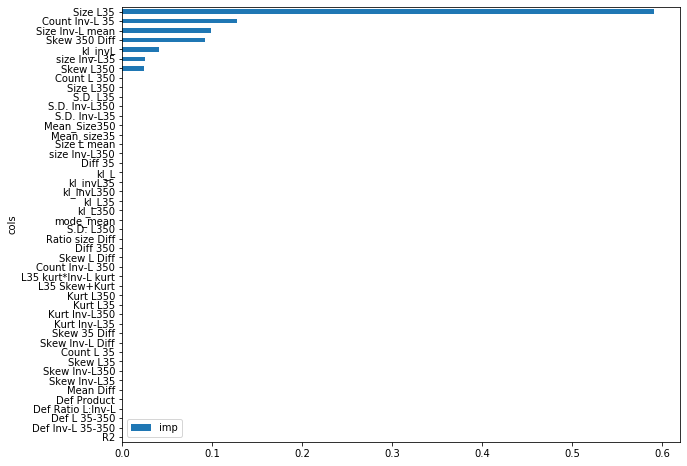

In [30]:
import pandas as pd
dataset = pd.read_csv('new features.csv')
df = pd.DataFrame({'cols':dataset.columns[2:], 'imp':clf.feature_importances_})
ax = df.sort_values("imp").plot.barh(x='cols', y='imp', figsize=(10,8))

In [31]:
feature_imp_dict = dict(zip(dataset.columns[2:], clf.feature_importances_))
feature_imp_dict = sorted(feature_imp_dict, reverse=True, key = lambda x: feature_imp_dict[x])

In [32]:
result_record = []
for i in range(1, len(feature_imp_dict)):
    max_count = 50000   

    ### Load Data ###
    target = dataset['Patient']
    top_n_features = feature_imp_dict[:i]
    features = dataset[top_n_features]
    
    target = target.where(target >= 0, 0)
    target = target.where(target <= 1, 1)    
    features = StandardScaler().fit_transform(features)
    
    sensitivity, specificity, accuracy, precision, MCC, total_count, nums, new_clf = train(features, target.values, max_count)
    TP, FP, TN, FN, P, N = nums    

    print('========= File Data: selected TOP ' + str(i)+ ' features =========')
    print('(Accuracy) = %0.3f' %(accuracy)+'%')
    result_record.append([sensitivity, specificity, accuracy, precision])
    ### END ###

========= File Data: selected TOP 1 features =========
(Accuracy) = 78.866%
========= File Data: selected TOP 2 features =========
(Accuracy) = 86.327%
========= File Data: selected TOP 3 features =========
(Accuracy) = 88.335%
========= File Data: selected TOP 4 features =========
(Accuracy) = 86.379%
========= File Data: selected TOP 5 features =========
(Accuracy) = 86.615%
========= File Data: selected TOP 6 features =========
(Accuracy) = 85.507%
========= File Data: selected TOP 7 features =========
(Accuracy) = 85.005%
========= File Data: selected TOP 8 features =========
(Accuracy) = 84.091%
========= File Data: selected TOP 9 features =========
(Accuracy) = 85.083%
========= File Data: selected TOP 10 features =========
(Accuracy) = 83.739%
========= File Data: selected TOP 11 features =========
(Accuracy) = 83.905%
========= File Data: selected TOP 12 features =========
(Accuracy) = 84.823%
========= File Data: selected TOP 13 features =========
(Accuracy) = 85.729%
========

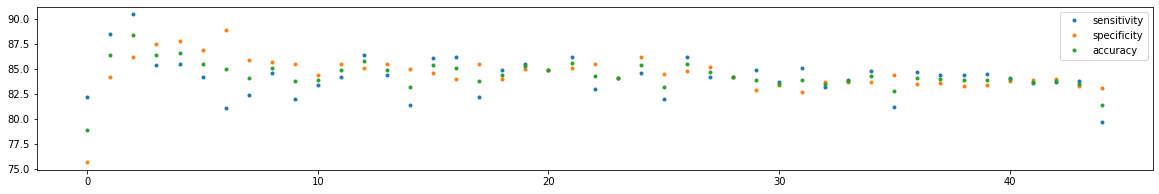

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,3)
x = np.arange(len(result_record))
sensitivity, specificity, accuracy, precision = [i[0] for i in result_record],[i[1] for i in result_record], [i[2] for i in result_record],[i[3] for i in result_record]
plt.plot(x, sensitivity, '.',  label='sensitivity')
plt.plot(x, specificity, '.',  label='specificity')
plt.plot(x, accuracy, '.',  label='accuracy')
# plt.plot(x, precision, '.',  label='precision')
plt.legend()
plt.show()


In [34]:
max(sensitivity),max(specificity),max(accuracy), max(precision)

(90.45778716283517, 88.90711256900552, 88.33493320534357, 87.97171857378329)

In [35]:
np.mean(sensitivity),np.mean(specificity),np.mean(accuracy), np.mean(precision)

(84.18773826549949, 84.49066824192347, 84.33943062332791, 84.46219596067905)

## Other Distribution

In [36]:
# Chi Seng new counts:
# data = '0 0 530 6374 11892 7631 320 14 22 4 0 0 0 0 0 0 0 0 0 0 6 7 6 8 9 12 17 0 6 0 0 0 0 0 0 0 0 0'
# data = data.split(' ')
# data = [int(i) for i in data]

In [37]:
data = [0 for i in range(15)]
data[0:7] = [1,531, 20886, 23360, 25157, 5239,35]
data

[1, 531, 20886, 23360, 25157, 5239, 35, 0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
# myfilepath = r'D:\\Capstone\CODE\counts.xlsx'
# import pandas
# excel_data_df = pandas.read_excel(myfilepath, sheet_name='counts')
# # print whole sheet data
# print(excel_data_df)

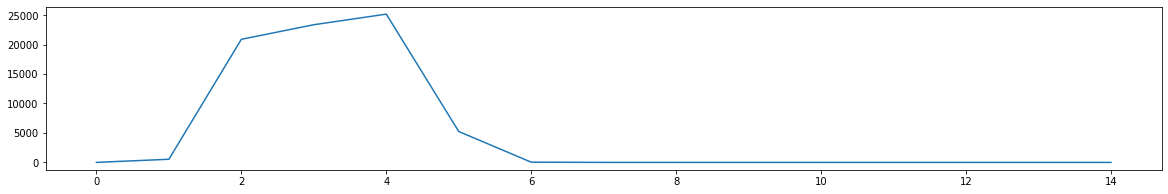

In [39]:
import matplotlib.pyplot as plt
plt.plot(data)

In [40]:
# https://fitter.readthedocs.io/en/latest/
from fitter import Fitter
f = Fitter(data)
f.distributions = f.distributions[0:10] + ['gamma']
f.fit()

C:\Anaconda3\envs\heyjody\lib\site-packages\scipy\stats\_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Anaconda3\envs\heyjody\lib\site-packages\scipy\stats\_continuous_distns.py:422: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


Fitted alpha distribution with error=7.096416791669068e-06)
Fitted anglit distribution with error=7.247520374287907e-06)
Fitted arcsine distribution with error=7.118545327607323e-06)


C:\Anaconda3\envs\heyjody\lib\site-packages\scipy\stats\_distn_infrastructure.py:1702: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))
C:\Anaconda3\envs\heyjody\lib\site-packages\scipy\stats\_continuous_distns.py:7953: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
C:\Anaconda3\envs\heyjody\lib\site-packages\scipy\stats\_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Anaconda3\envs\heyjody\lib\site-packages\scipy\stats\_continuous_distns.py:708: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Anaconda3\envs\heyjody\lib\site-packages\scipy\stats\_continuous_distns.py:712: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Anaconda3\envs\heyjody\lib\site-packages\scipy\stats\_distn_infrast

Fitted argus distribution with error=7.404058471170068e-06)
Fitted beta distribution with error=5.9162333127034625e-06)
Fitted betaprime distribution with error=7.373761361674742e-06)
Fitted bradford distribution with error=5.721631704947329e-06)
Fitted burr distribution with error=6.523391639571016e-06)
Fitted burr12 distribution with error=5.6844088094084006e-06)
Fitted cauchy distribution with error=7.37376141395524e-06)
Fitted gamma distribution with error=4.609012801458442e-06)


,sumsquare_error,aic,bic,kl_div
gamma,0.000005,2321.833855,-216.809055,inf
burr12,0.000006,2670.582219,-210.955304,inf
bradford,0.000006,2188.382309,-213.565450,inf
beta,0.000006,2284.750700,-210.355711,inf
burr,0.000007,2563.469070,-208.890294,inf


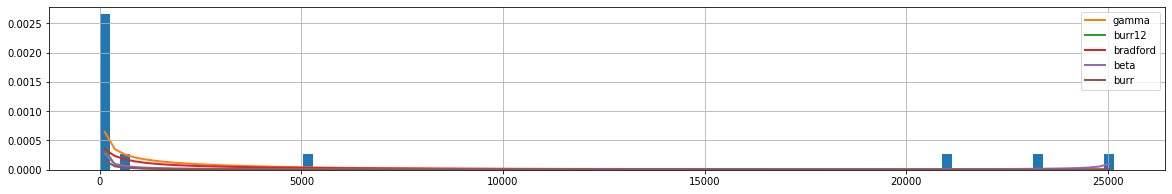

In [41]:
f.summary()